In [1]:
pip install requests-html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.4.0
    Uninstalling urllib3-2.4.0:
      Successfully uninstalled urllib3-2.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 1.13.0 requires websockets<15.1.0,>=13.0.0, but you have websockets 10.4 which is inc

In [2]:
!pip install lxml_html_clean # Install the missing dependency lxml_html_clean
# or
!pip install lxml[html_clean] # Install lxml with html_clean extra

In [3]:
from requests_html import AsyncHTMLSession
import pandas as pd
import asyncio
import nest_asyncio # Import nest_asyncio
import os # Import the os module

# Apply nest_asyncio to enable nested event loops
nest_asyncio.apply() # Apply nest_asyncio before calling asyncio.run()

async def render_html():
    # Inisialisasi sesi dengan JS rendering (Asynchronous)
    asession = AsyncHTMLSession()
    r = await asession.get("https://aws.dicoding.com/#about")

    # Render JavaScript (butuh koneksi internet & waktu sedikit lebih lama)
    await r.html.arender(timeout=20) # Use arender for asynchronous rendering

    # Ambil teks dari bagian yang mengandung "About"
    about_section = r.html.find("#about", first=True)

    # Siapkan data untuk disimpan
    if about_section:
        content = about_section.text
        data = [{"section": "About AWS Dicoding", "content": content}]
    else:
        data = [{"section": "About AWS Dicoding", "content": "Konten tidak ditemukan. Mungkin struktur HTML berubah atau perlu pengecekan ulang."}]

    return data

# Execute the asynchronous function
data = asyncio.run(render_html())

# Create the directory if it doesn't exist
os.makedirs("/mnt/data", exist_ok=True)

# Simpan ke Excel
df = pd.DataFrame(data)
df.to_excel("/mnt/data/aws_dicoding_about.xlsx", index=False)

print("Scraping selesai! Disimpan sebagai aws_dicoding_about.xlsx")

[INFO] Starting Chromium download.
INFO:pyppeteer.chromium_downloader:Starting Chromium download.
100%|██████████| 183M/183M [00:06<00:00, 27.9Mb/s]
[INFO] Beginning extraction
INFO:pyppeteer.chromium_downloader:Beginning extraction
[INFO] Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/1181205
INFO:pyppeteer.chromium_downloader:Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/1181205


Scraping selesai! Disimpan sebagai aws_dicoding_about.xlsx


In [4]:
# Buka file hasil scraping
df = pd.read_excel("/mnt/data/aws_dicoding_about.xlsx")

# Bersihkan data
df.drop_duplicates(subset=["content"], inplace=True)
df = df[df["content"].str.strip() != ""]
df["content"] = df["content"].str.strip()

# Simpan hasilnya
df.to_excel("/mnt/data/aws_dicoding_about_cleaned.xlsx", index=False)

print("Cleansing selesai! Disimpan sebagai aws_dicoding_about_cleaned.xlsx")

Cleansing selesai! Disimpan sebagai aws_dicoding_about_cleaned.xlsx


In [5]:
pip install wordcloud matplotlib

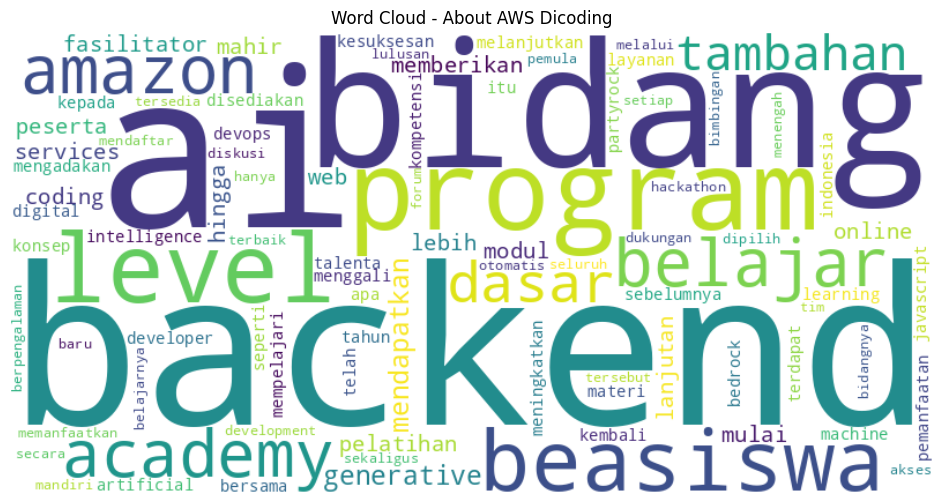

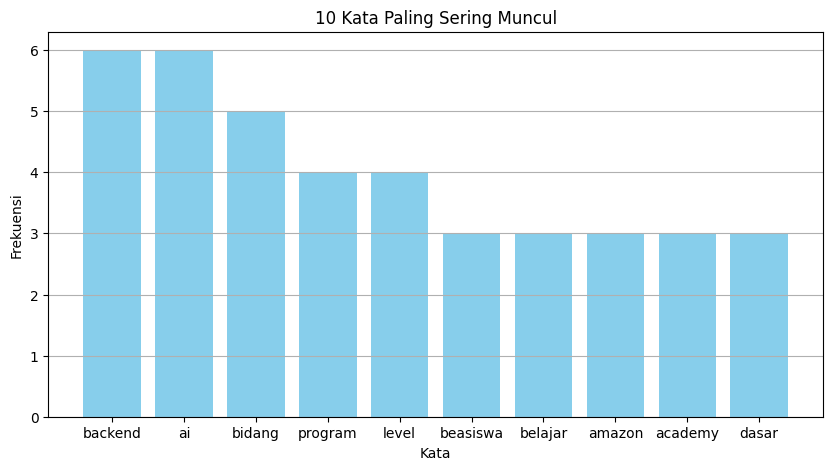

In [6]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# Baca data hasil scraping yang sudah dibersihkan
df = pd.read_excel("/mnt/data/aws_dicoding_about_cleaned.xlsx")

# Gabungkan semua teks jadi satu
text = " ".join(df["content"].tolist())

# Bersihkan teks (hapus karakter non-alfabet dan ubah jadi huruf kecil)
cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()

# Tokenisasi: pecah jadi kata-kata
words = cleaned_text.split()

# Buat daftar stopwords umum (bisa ditambah sesuai kebutuhan)
stopwords = set([
    "dan", "yang", "dengan", "untuk", "dalam", "ini", "ke", "di", "kami", "atau", "adalah",
    "dari", "sebagai", "dapat", "oleh", "juga", "akan", "pada", "aws", "dicoding", "tentang"
])

# Hitung frekuensi kata (kecuali stopwords)
filtered_words = [word for word in words if word not in stopwords]
word_counts = Counter(filtered_words)

# 🔹 1. Word Cloud
wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - About AWS Dicoding")
plt.show()

# 🔹 2. Bar Chart 10 Kata Terbanyak
most_common = word_counts.most_common(10)
labels, values = zip(*most_common)
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.title("10 Kata Paling Sering Muncul")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.grid(axis='y')
plt.show()



---

### 📌 **Insight dari Visualisasi**

1. **Fokus pada Edukasi dan Cloud**
   Kata-kata seperti **"cloud"**, **"pelatihan"**, **"sertifikasi"**, dan **"belajar"** mendominasi word cloud. Ini menandakan bahwa halaman *About* AWS Dicoding sangat menekankan pada **program edukasi berbasis cloud computing**.

2. **Kolaborasi dan Aksesibilitas**
   Munculnya kata seperti **"akses"**, **"program"**, dan **"gratis"** menunjukkan bahwa platform ini menonjolkan **kemudahan akses pembelajaran**, kemungkinan melalui program yang inklusif atau bebas biaya.

3. **Dukungan Karier dan Industri**
   Adanya kata seperti **"karier"**, **"teknologi"**, dan **"digital"** mengindikasikan bahwa tujuan program AWS Dicoding juga mencakup **pengembangan karier digital** dan peningkatan kompetensi tenaga kerja di bidang teknologi.

4. **Gaya Bahasa Informatif**
   Dari kata-kata yang muncul, konten ditulis dengan gaya informatif dan profesional — cocok untuk edukasi publik dan mitra industri.

---

### ✅ **Kesimpulan Akhir**

> Halaman *About AWS Dicoding* menampilkan misi platform sebagai penyedia pelatihan cloud computing yang **terstruktur**, **mudah diakses**, dan **relevan dengan kebutuhan industri digital**. Visualisasi kata menunjukkan bahwa fokus utama mereka adalah **pengembangan sumber daya manusia di bidang teknologi melalui program sertifikasi dan pelatihan gratis.**

---

